# Column translation

In [126]:
import os
import sys

# Add modules path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [127]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from Translator import Translator
from preprocessor import define_blocks
from visualization import plot_blocks

# Define language and translator functions
language = "es"
translator = Translator(language)
to_lang = translator.translate_to_language
to_col = translator.translate_to_column

# Load data
raw_data = pd.read_csv("sample.txt", header=0, skiprows=1, delimiter="\t", index_col=0, usecols=list(range(0, 9)),
                       parse_dates=to_lang(["Datetime"]), decimal=",",
                       date_parser=lambda x: pd.to_datetime(x, format="%Y/%m/%d %H:%M"))
# Translate column names
raw_data.columns = (to_col(raw_data.columns))

raw_data.iloc[[0, 1, 7, 8]]

,Datetime,Register_Type,Glucose_Auto,Glucose_Manual,Rapid_Insulin_No_Val,Rapid_Insulin,Carbo_No_Val,Carbo
ID,,,,,,,,
36781,2016-03-31 15:44:00,1,NaN,64.0,NaN,NaN,NaN,NaN
36817,2016-03-31 15:43:00,0,61.0,NaN,NaN,NaN,NaN,NaN
36823,2016-03-31 17:23:00,4,NaN,NaN,NaN,1.0,NaN,NaN
36823,2016-03-31 17:23:00,5,NaN,NaN,NaN,NaN,NaN,1.5


# Divide in blocks

In [128]:
data = define_blocks(raw_data)
data[data["Datetime"].dt.date == datetime.date(2016, 4, 1)]

,Datetime,Glucose_Auto,Block,Day_Block,Overlapped_Block,Carbo_Block,Rapid_Insulin_Block
33,2016-04-01 00:01:00,82.0,2,2016-03-31,False,1.0,1.0
34,2016-04-01 00:16:00,84.0,2,2016-03-31,False,1.0,1.0
35,2016-04-01 00:31:00,95.0,2,2016-03-31,False,1.0,1.0
36,2016-04-01 00:46:00,96.0,2,2016-03-31,False,1.0,1.0
37,2016-04-01 01:01:00,96.0,2,2016-03-31,False,1.0,1.0
38,2016-04-01 01:18:00,113.0,2,2016-03-31,False,1.0,1.0
39,2016-04-01 01:33:00,141.0,0,2016-04-01,False,0.0,0.0
40,2016-04-01 01:48:00,156.0,0,2016-04-01,False,0.0,0.0
41,2016-04-01 02:03:00,148.0,0,2016-04-01,False,0.0,0.0
42,2016-04-01 02:18:00,156.0,0,2016-04-01,False,0.0,0.0


NonGuiException: 

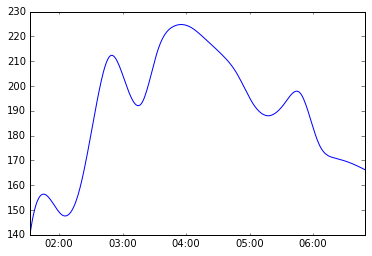

In [128]:
plot_blocks(data, datetime.date(2016, 4, 1), translator)

# Extending dataset


## Add block information

In [ ]:
new_columns = data.groupby(['Block', 'Day_Block']).agg({'Glucose_Auto': [np.mean, np.std, np.min, np.max]})["Glucose_Auto"]
new_columns.columns = ["Glucose_Mean_Block", "Glucose_Std_Block", "Glucose_Min_Block", "Glucose_Max_Block"]
new_columns = new_columns.reset_index(level=[0, 1])
new_data = pd.merge(data, new_columns, on=["Block", "Day_Block"], how='left')
new_data[["Datetime", "Glucose_Auto", "Block", "Day_Block", "Glucose_Mean_Block", "Glucose_Std_Block", 
          "Glucose_Min_Block", "Glucose_Max_Block"]].iloc[[1, 20, 40, 60, 80, 100]]

,Datetime,Glucose_Auto,Block,Day_Block,Glucose_Mean_Block,Glucose_Std_Block,Glucose_Min_Block,Glucose_Max_Block
1,2016-03-31 15:58:00,61.0,1,2016-03-31,85.130435,19.934676,55.0,119.0
20,2016-03-31 20:14:00,111.0,1,2016-03-31,85.130435,19.934676,55.0,119.0
40,2016-04-01 00:01:00,82.0,2,2016-03-31,105.000000,13.128733,82.0,123.0
60,2016-04-01 05:03:00,193.0,0,2016-04-01,189.571429,25.120851,141.0,224.0
80,2016-04-01 09:36:00,94.0,2,2016-04-01,92.458333,29.342030,47.0,139.0
100,2016-04-01 12:06:00,59.0,2,2016-04-01,92.458333,29.342030,47.0,139.0


## Add day information

In [ ]:
new_columns = new_data.groupby(['Day_Block']).agg({'Glucose_Auto': [np.mean, np.std, np.min, np.max]})["Glucose_Auto"]
new_columns.columns = ["Glucose_Mean_Day", "Glucose_Std_Day", "Glucose_Min_Day", "Glucose_Max_Day"]
new_columns = new_columns.reset_index(level=0)
new_data = pd.merge(new_data, new_columns, on='Day_Block', how='left')
new_data[["Datetime", "Glucose_Auto", "Block", "Day_Block", "Glucose_Mean_Day", "Glucose_Std_Day",
          "Glucose_Min_Day", "Glucose_Max_Day"]].iloc[[1, 20, 40, 60, 80, 100]]

(2180, 15) (2180, 7)


,Datetime,Glucose_Auto,Block,Day_Block,Glucose_Mean_Day,Glucose_Std_Day,Glucose_Min_Day,Glucose_Max_Day
1,2016-03-31 15:58:00,61.0,1,2016-03-31,95.065217,19.479222,55.0,123.0
20,2016-03-31 20:14:00,111.0,1,2016-03-31,95.065217,19.479222,55.0,123.0
40,2016-04-01 00:01:00,82.0,2,2016-03-31,95.065217,19.479222,55.0,123.0
60,2016-04-01 05:03:00,193.0,0,2016-04-01,116.715152,44.708378,47.0,224.0
80,2016-04-01 09:36:00,94.0,2,2016-04-01,116.715152,44.708378,47.0,224.0
100,2016-04-01 12:06:00,59.0,2,2016-04-01,116.715152,44.708378,47.0,224.0


## Calculating MAGE (Glycemic variability)

Standard deviation is 44.572693
Peaks indexes are: [9, 38, 102, 152, 31, 49, 144]
Peaks values are: [224.0, 139.0, 169.0, 161.0, 93.0, 47.0, 52.0]


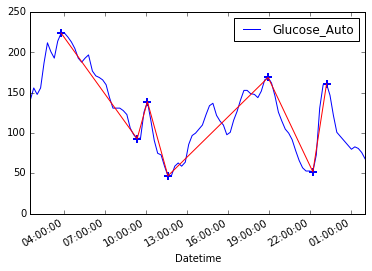

In [207]:
import peakdetect

day = datetime.datetime(2016, 4, 1)
values = new_data[new_data["Day_Block"] == day.date()][["Datetime", "Glucose_Auto"]].reset_index(drop=True)
vector = values["Glucose_Auto"]

std = np.std(vector)

peaks = peakdetect.peakdetect(np.array(vector), lookahead=2, delta=std)
# peakdetect returns two lists, respectively positive and negative peaks,
# with for each peak a tuple of (indexes, values).
indexes = []
peak_values =[]
for posOrNegPeaks in peaks:
    for peak in posOrNegPeaks:
        indexes.append(peak[0])
        peak_values.append((peak[1]))
print('Standard deviation is {:f}'.format(std))
print('Peaks indexes are: %s' % (indexes))
print('Peaks values are: %s' % (peak_values))

_, ax = plt.subplots()
values.plot(ax=ax, kind='line', x="Datetime", y="Glucose_Auto")
ax.plot(values.ix[indexes]["Datetime"], values.ix[indexes]["Glucose_Auto"], '+', mfc=None, mec='b', mew=2, ms=8)
ax.plot(values.ix[sorted(indexes)]["Datetime"], values.ix[sorted(indexes)]["Glucose_Auto"], mfc=None, mec='g', mew=2, ms=8)

plt.show()

In [188]:
differences = []
for first, second in zip(peak_values, peak_values[1:]):
    differences.append(np.abs(first-second))
differences

[85.0, 30.0, 8.0, 68.0, 46.0, 5.0]

In [193]:
#Filter diferences greater than standard deviation
valid_differences = [elem for elem in differences if elem > std]
valid_differences

[85.0, 68.0, 46.0]

In [194]:
MAGE = sum(valid_differences) / len(valid_differences)
MAGE

66.333333333333329